# Text Vectorization Using Traditional Methods

- There are many ways to vectorize a text into **numeric** representations.
- In traditional linguistic studies, linguists may **manually** annotate a text based on self-defined linguistic properties. These heuristics-based annotations can be easily converted into numeric values, thus in turn, vectorizing the text.
- In statistical language processing, it is important to reduce the effort of manual annotation and come up with ways to **automatically** vectorize a text.
- In this tutorial, we will look at the most widely-used method in machine learning NLP, the **bag-of-words** method for text vectorization.


## Import necessary dependencies and settings

In [1]:
# import warnings
# warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib
import matplotlib.pyplot as plt

## Default Style Settings
matplotlib.rcParams['figure.dpi'] = 150
pd.options.display.max_colwidth = 200
#%matplotlib inline

## Sample Corpus of Text Documents

- To have a quick intuition of how bag-of-words work, we start with a naive corpus, one consisting of eight documents. Each document is in fact a simple sentence.
- Each document in the corpus has a label (potentially referring to its **topic**).

In [33]:
corpus = [
    'The sky is blue and beautiful.', 'Love this blue and beautiful sky!',
    'The quick brown fox jumps over the lazy dog.',
    "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
    'I love green eggs, ham, sausages and bacon!',
    'The brown fox is quick and the blue dog is lazy!',
    'The sky is very blue and the sky is very beautiful today',
    'The dog is lazy but the brown fox is quick!'
]
labels = [
    'weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather',
    'animals'
]

corpus = np.array(corpus) # np.array better than list
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


:::{tip}

In text processing, people often cast `list` into `np.array` for efficiency. A numpy array is a lot faster than the native `list` in Python. 

If you are interested, please check this [YouTube Numpy Crash Course](https://www.youtube.com/watch?v=9JUAPgtkKpI&t=1868s).

:::

## Simple Text Preprocessing

- A few steps for text preprocessing
    - Remove special characters
    - Normalize letter case
    - Remove redundant spaces
    - Tokenize each document into word-tokens
    - Remove stop words
- All these preprocessing steps are wrapped in one function, `normalize_document()`.

In [3]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [38]:
norm_corpus = normalize_corpus(corpus)
print(corpus)
print("="*50)
print(norm_corpus)

['The sky is blue and beautiful.' 'Love this blue and beautiful sky!'
 'The quick brown fox jumps over the lazy dog.'
 "A king's breakfast has sausages, ham, bacon, eggs, toast and beans"
 'I love green eggs, ham, sausages and bacon!'
 'The brown fox is quick and the blue dog is lazy!'
 'The sky is very blue and the sky is very beautiful today'
 'The dog is lazy but the brown fox is quick!']
['sky blue beautiful' 'love blue beautiful sky'
 'quick brown fox jumps lazy dog'
 'kings breakfast sausages ham bacon eggs toast beans'
 'love green eggs ham sausages bacon' 'brown fox quick blue dog lazy'
 'sky blue sky beautiful today' 'dog lazy brown fox quick']


## Bag of Words Model

- Bag-of-words model is the simplest way (i.e., easy to be automated) to vectorize texts into numeric representations.
- In short, it is a method to represent a text using its word frequency list.

![](../images/text-representation-bow.gif)

### `CountVectorizer()` from `sklearn`

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [43]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


In [44]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [8]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


- Issues with Bag-of-Words Text Representation
    - **Word order** is ignored.
    - **Raw** absolute frequency counts of words do not necessarily represent the meaning of the text properly.
    - **Marginal** frequencies play important roles. (Row and Columns)


## Improving Bag-of-Words Text Representation

- In BOW text representation, the most crucial question is to identify words that are indeed **representative** of the semantics of texts.
- To improve the BOW representation:
    - We can extend from unigram-based BOW model to **n-gram** based BOW model to consider partially the word order in texts.
    - We can **filter** words based on the distributional criteria (e.g., term frequencies) or morphosyntactic patterns (e.g., morphological endings).
    - We can **weight** the BOW raw frequency counts.

In `CountVectorizer()`, we can utilize its parameters:

- `max_df`: When building the vocabulary, the vectorizer will ignore terms that have a **document frequency** strictly higher than the given threshold (corpus-specific stop words). `float` = the parameter represents a proportion of documents; `integer` = absolute counts.
- `min_df`: When building the vocabulary, the vectorizer will ignore terms that have a **document frequency** strictly lower than the given threshold. `float` = the parameter represents a proportion of documents; `integer` = absolute counts.
- `max_features` : Build a vocabulary that only consider the top `max_features` ordered by term frequency across the corpus.
- `ngram_range` : The lower and upper boundary of the range of n-values for different word n-grams. `tuple` (min_n, max_n), default=(1, 1). 
- `token_pattern`: Regular expression denoting what constitutes a "token" in vocabulary. The default regexp select tokens of 2 or more alphanumeric characters (Note: **punctuation** is completely ignored and always treated as a token separator).


:::{tip}

When applying the `CountVectorizer()` to Chinese data, if you have word-segmented your corpus data, then remember to specify the `token_pattern` in `CountVectorizer()` to ensure the integrity of the original word tokens.

:::

## N-gram Bag-of-Words Text Representation

In [9]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2, 2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Model

- TF-IDF model is an extension of the bag-of-words model, whose main objective is to adjust the raw frequency counts by considering the **dispersion** of the words in the corpus.
- **Disperson** refers to how evenly each word/term is distributed across different documents of the corpus.

- Interaction between Word Raw Frequency Counts and Dispersion:
    - Given a **high-frequency** word:
        - If the word is widely dispersed across different documents of the corpus (i.e., **high dispersion**)
            - it is more likely to be semantically general.
        - If the word is mostly centralized in a limited set of documents in the corpus (i.e., **low dispersion**)
            - it is more likely to be topic-specific.
- Dispersion rates of words can be used as weights for the importance of word frequency counts.

- **Document Frequency** (**DF**) is an intuitive metric for measuring word dispersion across the corpus. DF refers to the number of documents where the word occurs (at least once).
- The inverse of the DF is referred to as **Inverse Document Frequency** (**IDF**). IDF is usually computed as follows:

$$ 
\textit{IDF} = 1 + log\frac{N}{1+df}
$$

:::{note}

All these plus-1's in the above formula are avoid potential division by zero errors.

:::

- The raw absolute frequency counts of words in the BOW model are referred to as **Term Frequency** (**TF**).
- The **TF-IDF** Weighting Scheme:

$$
\textit{TF-IDF}_{normalized} = \frac{tf \times idf}{\sqrt{(tf\times idf)^2}}
$$

- The `tfidf` is normalized using the L2 norm, i.e., the Euclidean norm (taking the square root of the sum of the square of `tfidf` metrics).

:::{tip}

- The L1 norm will drive some weights to 0, inducing sparsity in the weights. This can be beneficial for memory efficiency or when feature selection is needed (i.e., we want to select only certain weights).

- The L2 norm instead will reduce all weights but not all the way to 0. This is less memory efficient but can be useful if we want/need to retain all parameters.

:::

### `TfidfTransformer()` from `sklearn`

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

tt = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### `TfidfVectorizer()` from `sklearn`

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.,
                     max_df=1.,
                     norm='l2',
                     use_idf=True,
                     smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


## Intuition of TF-IDF

The following shows the creation and computation of the TFIDF matrix step by step. Please go over the codes on your own if you are interested.

### Create Vocabulary Dictionary of the Corpus

In [50]:
# get unique words as feature names
unique_words = list(
    set([word for doc in [doc.split() for doc in norm_corpus]
         for word in doc]))

# default dict 
def_feature_dict = {w: 0 for w in unique_words}

print('Feature Names:', unique_words)
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['brown', 'breakfast', 'blue', 'bacon', 'love', 'fox', 'quick', 'dog', 'sky', 'sausages', 'green', 'lazy', 'beautiful', 'kings', 'jumps', 'ham', 'today', 'toast', 'beans', 'eggs']
Default Feature Dict: {'brown': 0, 'breakfast': 0, 'blue': 0, 'bacon': 0, 'love': 0, 'fox': 0, 'quick': 0, 'dog': 0, 'sky': 0, 'sausages': 0, 'green': 0, 'lazy': 0, 'beautiful': 0, 'kings': 0, 'jumps': 0, 'ham': 0, 'today': 0, 'toast': 0, 'beans': 0, 'eggs': 0}


### Create Document-Word Matrix (Bag-of-Word Frequencies)

In [51]:
from collections import Counter
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    # initialize default corpus dictionary
    all_features = Counter(def_feature_dict) 
    
    # update default dict with current doc words
    bow_feature_doc.update(all_features)
    
    # append cur doc dict
    bow_features.append(bow_feature_doc)

bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,1
4,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1
5,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0


### Compute Document Frequency of Words

In [52]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)

# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
# `csc_matrix()` compress `bow_features` into sparse matrix based on columns
# `csc_matrix.indices` stores the matrix value indices in each column
# `csc_matrix.indptr` stores the accumulative numbers of values from column-0 to the right-most column

df = 1 + df  # adding 1 to smoothen idf later

# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
0,4,5,4,4,2,3,3,4,4,4,3,2,4,2,2,3,2,2,2,3


### Create Inverse Document Frequency of Words

In [53]:
# compute inverse document frequencies for each term
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)

# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
0,1.81,1.59,1.81,1.81,2.5,2.1,2.1,1.81,1.81,1.81,2.1,2.5,1.81,2.5,2.5,2.1,2.5,2.5,2.5,2.1


### Compute Raw TF-IDF for Each Document

In [16]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf  ## `tf.shape` = (8,20), `idf.shape`=(20,)
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
0,1.81,1.59,1.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.00,0.0,0.0,2.1,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,0.00,1.81,0.0,0.0,0.0,1.81,1.81,1.81,0.0,0.0,1.81,0.0,2.5,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,2.5,2.1,0.0,0.00,0.00,0.00,2.1,0.0,0.00,2.5,0.0,2.1,0.0,2.5,2.5,2.1
4,0.00,0.00,0.00,0.00,0.0,2.1,2.1,0.00,0.00,0.00,2.1,2.5,0.00,0.0,0.0,2.1,0.0,0.0,0.0,2.1
5,0.00,1.59,0.00,1.81,0.0,0.0,0.0,1.81,1.81,1.81,0.0,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.5,0.0,0.0,0.0
7,0.00,0.00,0.00,1.81,0.0,0.0,0.0,1.81,1.81,1.81,0.0,0.0,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get L2 Norms of TF-IDF

In [17]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)  # get the L2 forms of tfidf according to columns

# print norms for each document
print(np.round(norms, 3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


### Compute Normalized TF-IDF for Each Document

In [18]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]

# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.38,0.38,0.38,0.00,0.00,0.38,0.00,0.53,0.00,0.0,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.38,0.32,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.38,0.00,0.32,0.0,0.38,0.38,0.32
4,0.00,0.00,0.00,0.00,0.00,0.39,0.39,0.00,0.00,0.00,0.39,0.47,0.00,0.00,0.00,0.39,0.0,0.00,0.00,0.39
5,0.00,0.37,0.00,0.42,0.00,0.00,0.00,0.42,0.42,0.42,0.00,0.00,0.42,0.00,0.00,0.00,0.0,0.00,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00
7,0.00,0.00,0.00,0.45,0.00,0.00,0.00,0.45,0.45,0.45,0.00,0.00,0.45,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [19]:
new_doc = 'the sky is green today'

pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
             columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


## Document Similarity

- Now each document in our corpus has been transformed into a **vectorized** representation using the naive Bag-of-Words method.
- And we believe that these vectorized representations are indicators of textual **semantics**.
- This vectorized text vectorization allows us to perform mathematical computation of the **semantic relationships** between documents.

## Similarity/Distance Metrics and Intuition

Take a two-dimensional space for instance. If we have vectors on this space, we can compute their distance/similarity mathematically:

![](../images/text-vec/text-vec.001.jpeg)

In [20]:
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity

In [21]:
xyz = np.array([[1, 9], [1, 3], [5, 1]])
xyz

array([[1, 9],
       [1, 3],
       [5, 1]])

In Math, there are in general two types of metrics to measure the relationship between vectors: **distance**-based vs. **similarity**-based metrics.

### Distance-based Metrics


- Many distance measures of vectors are based on the following formula and differ in individual parameter settings.

$$
\big( \sum_{i = 1}^{n}{|x_i - y_i|^y}\big)^{\frac{1}{y}}
$$

- The *n* in the above formula refers to the number of dimensions of the vectors. (In other words, all the concepts we discuss here can be easily extended to vectors in multidimensional spaces.)
- When *y* is set to 2, it computes the famous **Euclidean distance** of two vectors, i.e., the direct spatial distance between two points on the *n*-dimensional space.

$$
\sqrt{\big( \sum_{i = 1}^{n}{|x_i - y_i|^2}\big)}
$$



In [22]:
euclidean_distances(xyz)

array([[0.        , 6.        , 8.94427191],
       [6.        , 0.        , 4.47213595],
       [8.94427191, 4.47213595, 0.        ]])

- The geometrical meanings of the Euclidean distance are easy to conceptualize.

![](../images/text-vec-euclidean.gif)

### Similarity-based Metrics

- In addition to distance-based metrics, the other type is similarity-based metric, which often utilizes the idea of **correlations**. 
- The most commonly used one is **Cosine Similarity**, which can be computed as follows:

$$
cos(\vec{x},\vec{y}) = \frac{\sum_{i=1}^{n}{x_i\times y_i}}{\sqrt{\sum_{i=1}^{n}x_i^2}\times \sqrt{\sum_{i=1}^{n}y_i^2}}
$$


In [23]:
cosine_similarity(xyz)

array([[1.        , 0.97780241, 0.30320366],
       [0.97780241, 1.        , 0.49613894],
       [0.30320366, 0.49613894, 1.        ]])

- The geometric meanings of **cosines** of two vectors are connected to the **arcs** between the vectors. 
- The greater their cosine similarity, the smaller the arcs, the closer (i.e., the more similar) they are.

![](../images/text-vec-similarity2.png)

![](../images/text-vec-cosine.gif)

### Which Metrics to Use then?

- Please note that different metrics may lead to very different results. 
- In our earlier examples, if we adopt **euclidean distance**, then y is closer to z than is to x.
- But if we adopt **cosine similarity**, then y is closer to x than is to z.
- The choice of distance/similarity metrics depends on:
    - Whether the magnitude of value differences on each dimension of the vectors matters (distance-based preferred)
    - Whether the values of each dimension of the vectors co-vary (cosine referred)

## Pairwise Similarity Computation

- The `cosine_similarity` automatically computes the **pairwise** similarities between the **rows** of the input matrix.

In [24]:
similarity_doc_matrix = cosine_similarity(tv_matrix)
similarity_doc_df = pd.DataFrame(similarity_doc_matrix)
similarity_doc_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


## Clustering Documents Using Similarity Features

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_doc_matrix, 'ward')
# pd.DataFrame(Z,
#              columns=[
#                  'Document\Cluster 1', 'Document\Cluster 2', 'Distance',
#                  'Cluster Size'
#              ],
#              dtype='object')

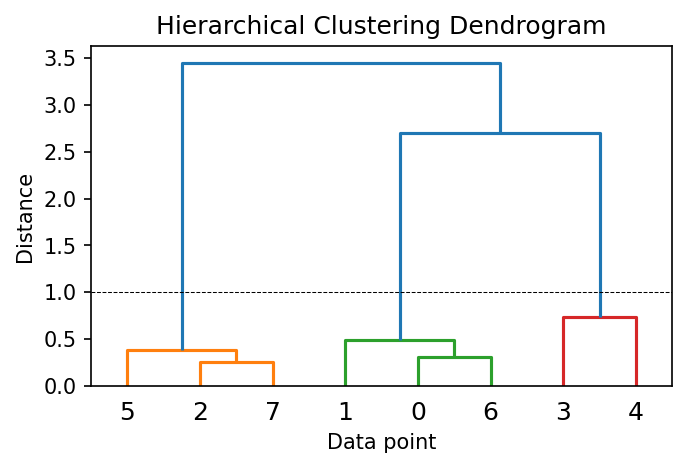

In [26]:
plt.figure(figsize=(5, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [57]:
## Convert hierarchical cluster into a flat cluster structure

from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


## Clustering Words Using Similarity Features

- We can also transpose the `tv_matrix` to get a Word-Document matrix.
- Each word can be represented as vectors based on their document distributions.
- Words that are semantically similar tend to show similar distributions.


In [56]:
similarity_term_matrix = cosine_similarity(np.transpose(tv_matrix))
similarity_term_df = pd.DataFrame(similarity_term_matrix,
                                  columns=feature_names,
                                  index=feature_names)
similarity_term_df

,sky,blue,beautiful,brown,breakfast,bacon,love,fox,quick,dog,sausages,green,lazy,kings,jumps,ham,today,toast,beans,eggs
sky,1.000000,0.63129,0.000000,0.000000,0.63129,0.000000,0.000000,1.000000,0.000000,0.775547,1.000000,0.000000,0.63129,0.000000,0.440615,0.000000,1.000000,0.000000,0.63129,0.000000
blue,0.631290,1.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.631290,0.000000,0.000000,0.631290,0.000000,1.00000,0.000000,0.000000,0.000000,0.631290,0.000000,1.00000,0.000000
beautiful,0.000000,0.00000,1.000000,0.899485,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.473517,0.000000,0.000000,0.951208,0.00000,0.420997
brown,0.000000,0.00000,0.899485,1.000000,0.00000,0.252766,0.252766,0.000000,0.252766,0.000000,0.000000,0.000000,0.00000,0.252766,0.425922,0.252766,0.000000,0.855597,0.00000,0.378680
breakfast,0.631290,1.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.631290,0.000000,0.000000,0.631290,0.000000,1.00000,0.000000,0.000000,0.000000,0.631290,0.000000,1.00000,0.000000
bacon,0.000000,0.00000,0.000000,0.252766,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.528473,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
love,0.000000,0.00000,0.000000,0.252766,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.528473,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
fox,1.000000,0.63129,0.000000,0.000000,0.63129,0.000000,0.000000,1.000000,0.000000,0.775547,1.000000,0.000000,0.63129,0.000000,0.440615,0.000000,1.000000,0.000000,0.63129,0.000000
quick,0.000000,0.00000,0.000000,0.252766,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.528473,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
dog,0.775547,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.775547,0.000000,1.000000,0.775547,0.000000,0.00000,0.000000,0.568135,0.000000,0.775547,0.000000,0.00000,0.000000


In [29]:
Z2 = linkage(similarity_term_matrix, 'ward')
# pd.DataFrame(Z2,
#              columns=[
#                  'Document\Cluster 1', 'Document\Cluster 2', 'Distance',
#                  'Cluster Size'
#              ],
#              dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,0,7,0,2
1,1,4,0,2
2,12,21,0,3
3,5,6,0,2
4,8,23,0,3
5,10,20,0,3
6,13,24,0,4
7,16,25,0,4
8,15,26,0,5
9,18,22,0,4


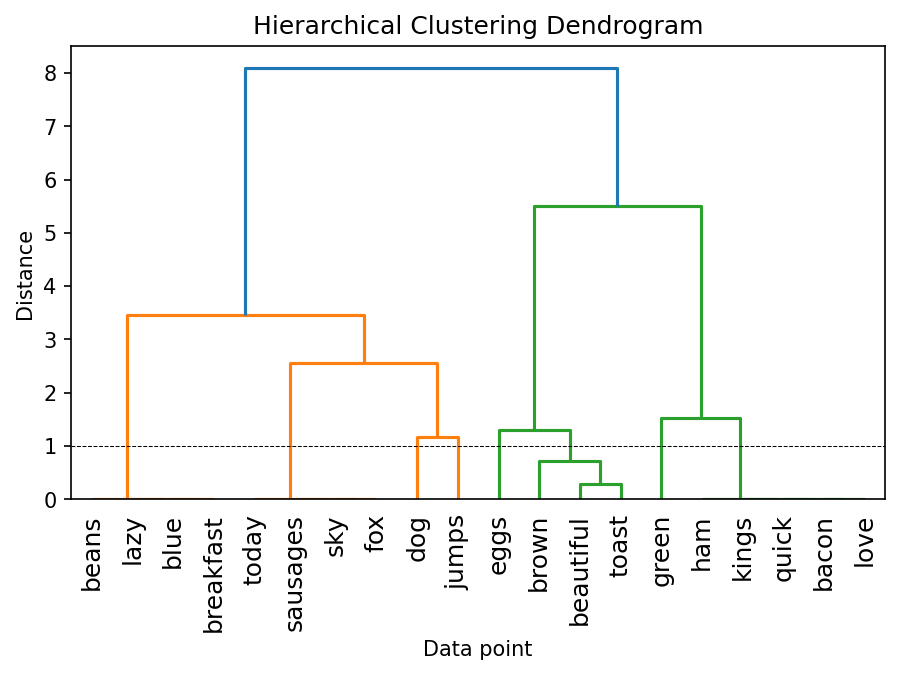

In [30]:
plt.figure(figsize=(7, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z2, labels=feature_names, leaf_rotation=90)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

## References

- Based on Sarkar (2020), Ch 4 Feature Engineering and Text Representation